# Section 2.1.1 One-at-a-Time

In [5]:
using Plots, Distributions, StatsPlots, Colors

In [6]:
# script for OAT method
# test function - functionally independent of x1,
# is linear in x2 and x3, is nonlinear in x4, 
# and contains an interaction in x5 and x6. 
function funOAT_nonl(𝐱)
    x₁,x₂,x₃,x₄,x₅,x₆ = 𝐱
#     return 1.0+1.5*x₂+1.5*x₃+0.6*x₄+1.7*x₄^2+0.7*x₅+0.8*x₆+0.5*x₅*x₆
    return 1.0+2.2*x₁+2.2*x₂^2+0.3*x₄+0.6*x₅^5+0.8*x₆+0.2*x₅*x₆
end;

In [10]:
Δ = 0.1
𝐱₀ = 1.0*ones(6)
𝐱₀_sub = 𝐱₀-Δ*𝐱₀
𝐱₀_add = 𝐱₀+Δ*𝐱₀;

y_base = funOAT_nonl(𝐱₀)
y_sub = Array{Float64,1}(undef, length(𝐱₀))
y_add = Array{Float64,1}(undef, length(𝐱₀))
for i in 1:length(𝐱₀)
    𝐱_sub = copy(𝐱₀)
    𝐱_add = copy(𝐱₀)
    𝐱_sub[i] = 𝐱₀_sub[i]
    𝐱_add[i] = 𝐱₀_add[i]
    y_sub[i] = funOAT_nonl(𝐱_sub)
    y_add[i] = funOAT_nonl(𝐱_add)
end

Δy_sum = sum(hcat(abs.(y_base.-y_sub), abs.(y_base.-y_add)),dims=2)
y_rel = Δy_sum./𝐱₀[1]
diff_quotient = (y_add .- y_base)/(Δ*.1);

## Figure 2.2 (a)

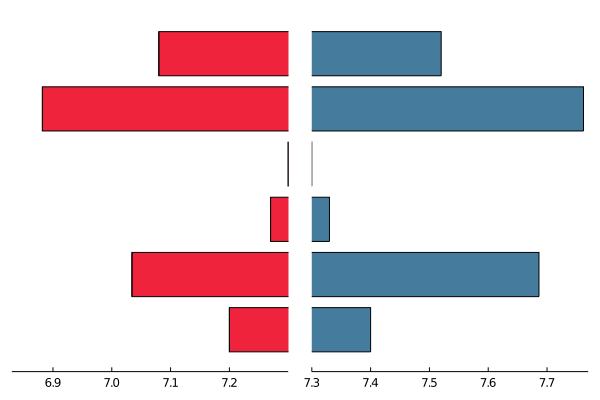

In [11]:
nround=2
color_sub = colorant"#ef233c"
color_add = colorant"#457b9d"
δ = round(maximum(hcat(abs.(y_base.-y_sub), abs.(y_base.-y_add)))+0.005,digits=nround)
l = @layout [a b]
#0.0004 0.000001
p1 = groupedbar(reverse(hcat(10*ones(6),0.000001*ones(6),y_sub); dims=1), xlim=(y_base-δ,y_base),
                grid=:none,vlabel=:none, showaxis=:x, bar_position = :stack, label=:none,
                fillcolor = [color_sub :black :transparent], orientation=:horizontal, yticks=:none, lc=[:black :black :transparent])
p2 = bar(reverse(y_add;dims=1); orientation=:horizontal, grid=:none, fillcolor=color_add,
         xlims=(y_base,y_base+δ),yticks=:none, label=:none, showaxis=:x)
plot(p1,p2)

In [8]:
Δ = 0.1
𝐱₀ = .1*ones(6)
𝐱₀_sub = 𝐱₀-Δ*𝐱₀
𝐱₀_add = 𝐱₀+Δ*𝐱₀;

y_base = funOAT_nonl(𝐱₀)
y_sub = Array{Float64,1}(undef, length(𝐱₀))
y_add = Array{Float64,1}(undef, length(𝐱₀))
for i in 1:length(𝐱₀)
    𝐱_sub = copy(𝐱₀)
    𝐱_add = copy(𝐱₀)
    𝐱_sub[i] = 𝐱₀_sub[i]
    𝐱_add[i] = 𝐱₀_add[i]
    y_sub[i] = funOAT_nonl(𝐱_sub)
    y_add[i] = funOAT_nonl(𝐱_add)
end

Δy_sum = sum(hcat(abs.(y_base.-y_sub), abs.(y_base.-y_add)),dims=2)
y_rel = Δy_sum./𝐱₀[1]
diff_quotient = (y_add .- y_base)/(Δ*.1);

## Figure 2.2 (b)

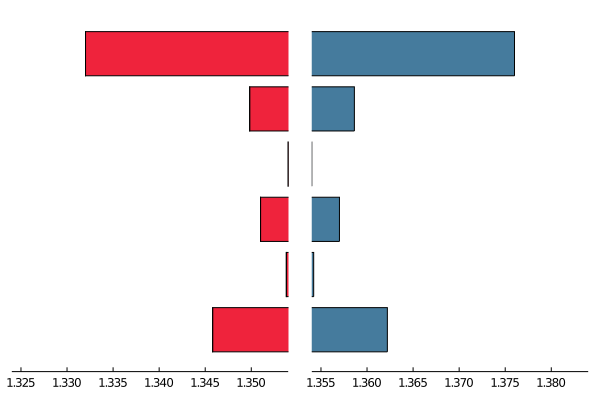

In [9]:
nround=2
color_sub = colorant"#ef233c"
color_add = colorant"#457b9d"
δ = round(maximum(hcat(abs.(y_base.-y_sub), abs.(y_base.-y_add)))+0.005,digits=nround)
l = @layout [a b]
#0.0004 0.000001
p1 = groupedbar(reverse(hcat(10*ones(6),0.000001*ones(6),y_sub); dims=1), xlim=(y_base-δ,y_base),
                grid=:none,vlabel=:none, showaxis=:x, bar_position = :stack, label=:none,
                fillcolor = [color_sub :black :transparent], orientation=:horizontal, yticks=:none, lc=[:black :black :transparent])
p2 = bar(reverse(y_add;dims=1); orientation=:horizontal, grid=:none, fillcolor=color_add,
         xlims=(y_base,y_base+δ),yticks=:none, label=:none, showaxis=:x)
plot(p1,p2)